In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import tensorflow as tf
from tensorflow import keras
# from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
# from sklearn.manifold import Isomap, TSNE, MDS
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import random
import warnings 
warnings.simplefilter("ignore")

c:\Users\Yuval\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df=pd.read_csv('genres_v2.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [7]:
df2=pd.read_csv('audio_features.csv')
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.634,0.862,2,-5.337,1,0.0376,0.0287,0.000000,0.0217,0.767,95.989,audio_features,1zWZvrk13cL8Sl3VLeG57F,spotify:track:1zWZvrk13cL8Sl3VLeG57F,https://api.spotify.com/v1/tracks/1zWZvrk13cL8...,https://api.spotify.com/v1/audio-analysis/1zWZ...,227693,4
1,0.595,0.389,2,-9.245,1,0.0349,0.4180,0.000001,0.1160,0.400,166.052,audio_features,5kNe7PE09d6Kvw5pAsx23n,spotify:track:5kNe7PE09d6Kvw5pAsx23n,https://api.spotify.com/v1/tracks/5kNe7PE09d6K...,https://api.spotify.com/v1/audio-analysis/5kNe...,227427,4
2,0.543,0.837,11,-6.448,1,0.0608,0.1170,0.000000,0.0872,0.506,168.056,audio_features,6GsAD8PgHxmEuIPTG8GP3M,spotify:track:6GsAD8PgHxmEuIPTG8GP3M,https://api.spotify.com/v1/tracks/6GsAD8PgHxmE...,https://api.spotify.com/v1/audio-analysis/6GsA...,186080,4
3,0.688,0.702,7,-4.792,0,0.0499,0.0215,0.000000,0.1280,0.740,94.006,audio_features,6Knv6wdA0luoMUuuoYi2i1,spotify:track:6Knv6wdA0luoMUuuoYi2i1,https://api.spotify.com/v1/tracks/6Knv6wdA0luo...,https://api.spotify.com/v1/audio-analysis/6Knv...,192191,4
4,0.457,0.948,10,-3.364,1,0.0354,0.0191,0.000000,0.0536,0.878,148.000,audio_features,0i5el041vd6nxrGEU8QRxy,spotify:track:0i5el041vd6nxrGEU8QRxy,https://api.spotify.com/v1/tracks/0i5el041vd6n...,https://api.spotify.com/v1/audio-analysis/0i5e...,208960,4


In [6]:
print(df2.type.value_counts())
print(df2.time_signature.value_counts())

NameError: name 'df2' is not defined

In [8]:
print(len(df),len(df2))

42305 52915


In [9]:
data=df.drop(["type","type","id","uri","track_href","analysis_url","song_name",
                "Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


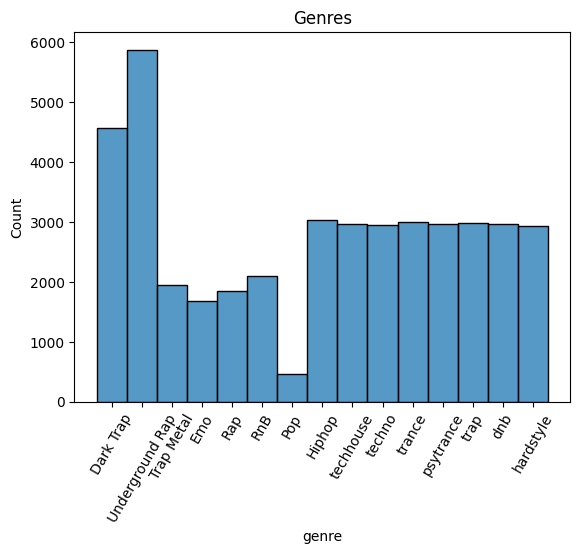

In [10]:
ax = sns.histplot(data["genre"])
_ = plt.xticks(rotation=60)
_ = plt.title("Genres")

In [17]:
x = data.loc[:,:"tempo"]
y = data["genre"]

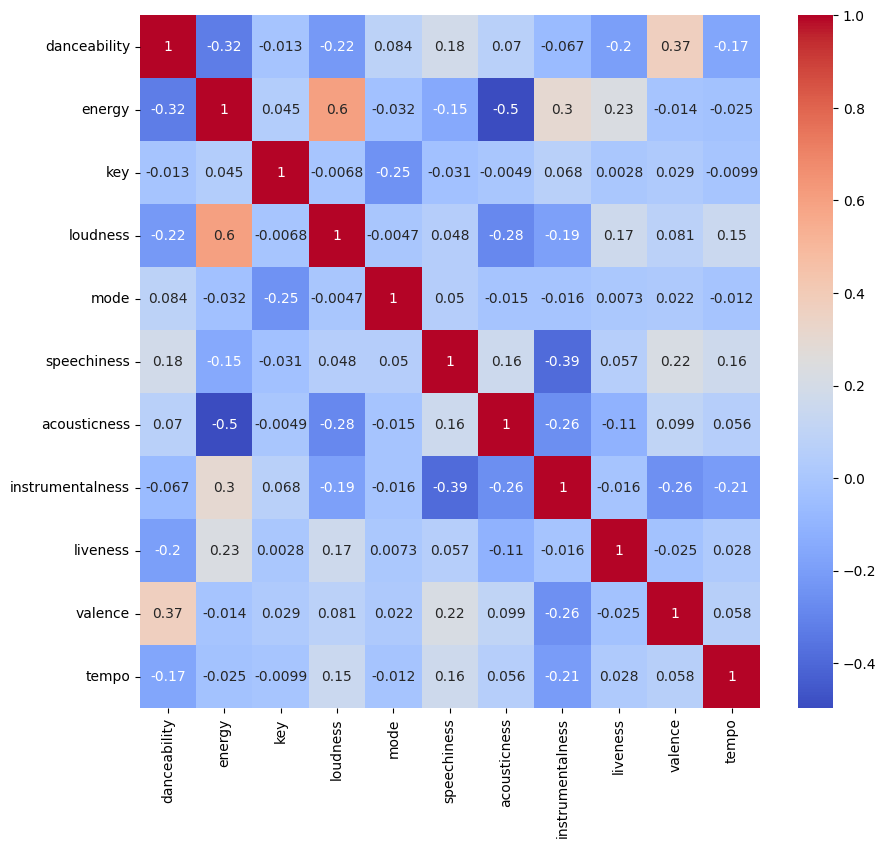

In [18]:
plt.subplots(figsize=(10,9))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

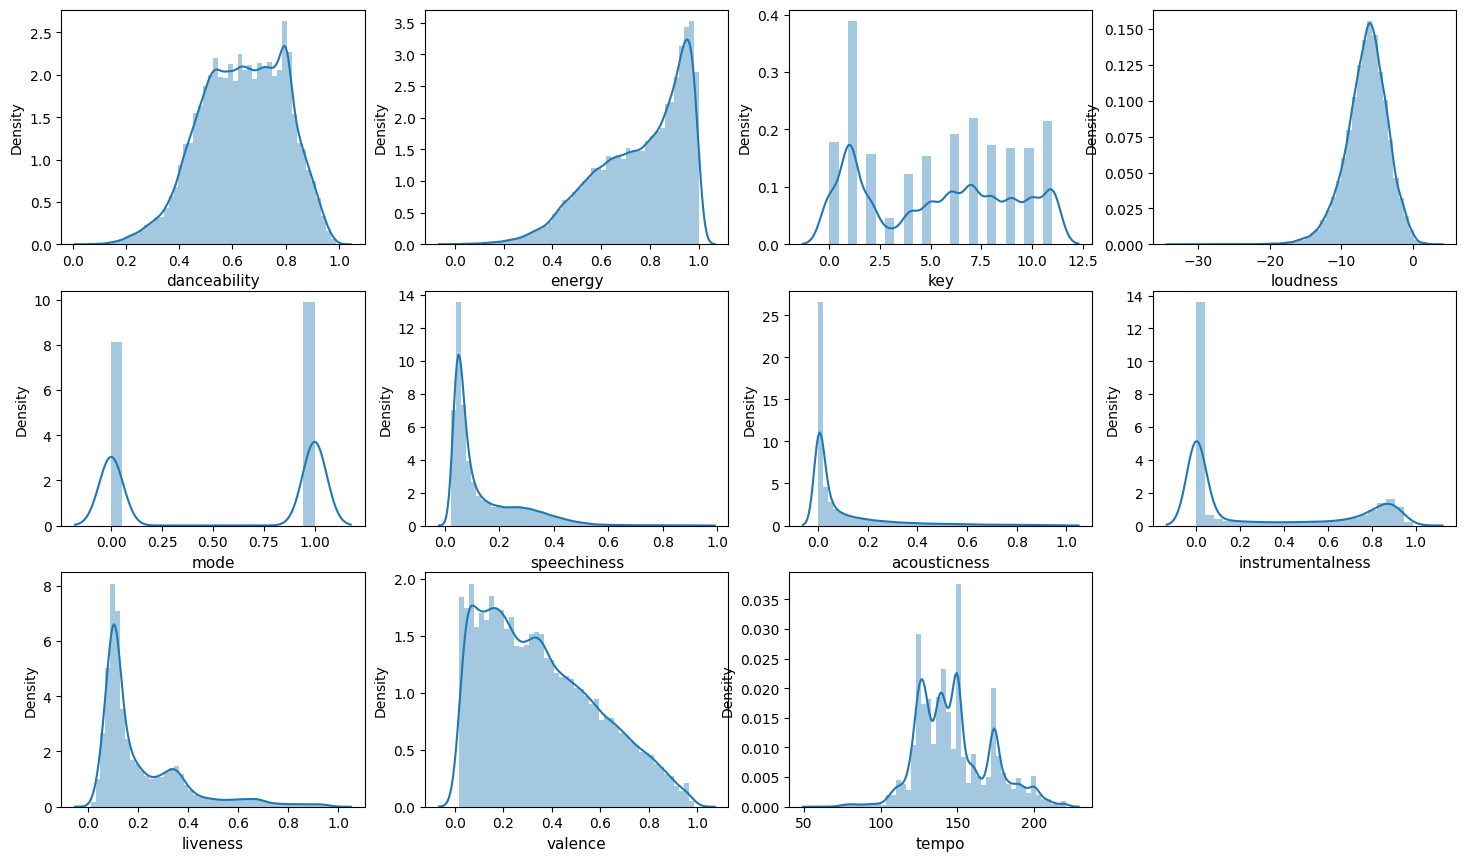

In [19]:
k=0
plt.figure(figsize = (18,14))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=11)
    k +=1

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
test_size= 0.2, random_state=42, shuffle = True)

In [22]:
col = xtrain.columns
scalerx = MinMaxScaler()
xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)
xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [23]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [41]:
import pickle

pickle.dump(scalerx,open('scaler.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))

In [25]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                      

In [30]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 100,
                verbose = 1, batch_size = 256,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/100
133/133 [==============================] - 4s 14ms/step - loss: 1.0182 - accuracy: 0.6339 - val_loss: 0.9988 - val_accuracy: 0.6486
Epoch 2/100
133/133 [==============================] - 2s 14ms/step - loss: 1.0152 - accuracy: 0.6313 - val_loss: 1.0066 - val_accuracy: 0.6466
Epoch 3/100
133/133 [==============================] - 3s 24ms/step - loss: 1.0129 - accuracy: 0.6366 - val_loss: 0.9942 - val_accuracy: 0.6486
Epoch 4/100
133/133 [==============================] - 3s 21ms/step - loss: 1.0119 - accuracy: 0.6346 - val_loss: 0.9836 - val_accuracy: 0.6490
Epoch 5/100
133/133 [==============================] - 2s 17ms/step - loss: 1.0045 - accuracy: 0.6393 - val_loss: 0.9876 - val_accuracy: 0.6512
Epoch 6/100
133/133 [==============================] - 2s 17ms/step - loss: 1.0013 - accuracy: 0.6378 - val_loss: 0.9773 - val_accuracy: 0.6538
Epoch 7/100
133/133 [==============================] - 3s 24ms/step - loss: 0.9942 - accuracy: 0.6406 - val_loss: 0.9852 - val_accuracy:

In [31]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))


1058/1058 [==============================] - 7s 6ms/step - loss: 0.9225 - accuracy: 0.6629
[0.9224796295166016, 0.6629239916801453]
265/265 [==============================] - 2s 6ms/step - loss: 0.9825 - accuracy: 0.6539
[0.9825013875961304, 0.6539416313171387]


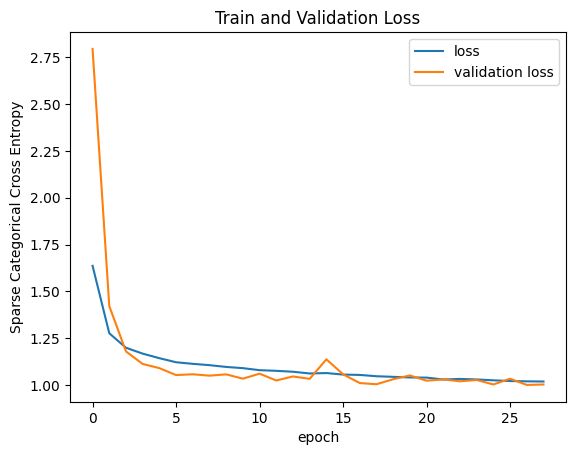

In [28]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

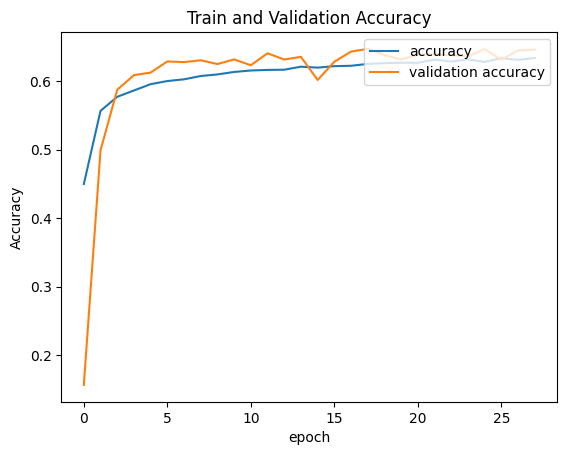

In [29]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [32]:
ypred = model.predict(xtest).argmax(axis=1)

265/265 [==============================] - 2s 5ms/step


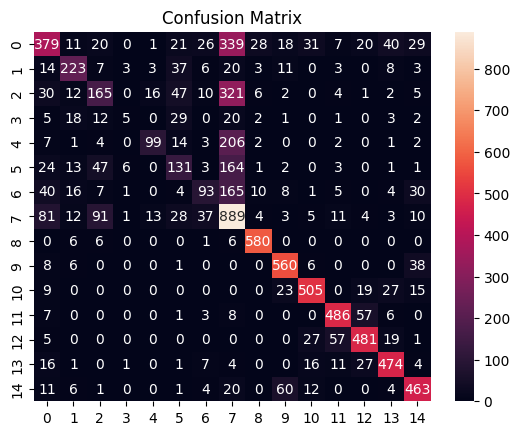

In [33]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [34]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47       970
           1       0.69      0.65      0.67       341
           2       0.46      0.27      0.34       621
           3       0.29      0.05      0.09        98
           4       0.75      0.29      0.42       341
           5       0.42      0.33      0.37       396
           6       0.48      0.24      0.32       384
           7       0.41      0.75      0.53      1192
           8       0.91      0.97      0.94       599
           9       0.81      0.90      0.86       619
          10       0.84      0.84      0.84       598
          11       0.82      0.86      0.84       568
          12       0.79      0.82      0.80       590
          13       0.80      0.84      0.82       562
          14       0.77      0.80      0.78       582

    accuracy                           0.65      8461
   macro avg       0.66      0.60      0.61      8461
weighted avg       0.66   